Suppose you made it to the final round of this seasons MasterChef competition,\
and you're serving your good friend Alice and your mortal enemy Bob an interesting challange...<br> 

They write down all the foods they're allergic to on a little pieces of paper and put them in a bag, along with the other audience members <br>
We now have a bag of words containing the following sets:

$A = \{ peanuts, shrimp, potato \} $

$B = \{ peanuts, kale, chicken \} $

$({A\cup B})^\complement = \{ salmon, apple, toast \} $

we draw 3 random words $\vec{z} = \set{peanuts, kale, potato}$ from the bag to make tonights banquet. \
Since Bob is planning to resurrect Hitler using misaligned AGI, we're interested in finding out which of the 3 ingredients are more likely to kill Bob.

</br>

The simple way we can do this is to measure the probability $p$ that $\vec{z}$ came from the set $B$ using a random variable $X \sim Ber(p)$, \
where $P(X = x) $ is the probability that $\vec{z}$ came from the set $B$.
Since there are 8 unique foods in the bag, there's $8\choose{3}$ = $\frac{8!}{3!(8-3)!} = 56$ possible  ways of choosing $\vec{z}$,  \
but only one way to choose exactly the 3 foods in $B$, making $p(x) = \frac{1}{56}$ 


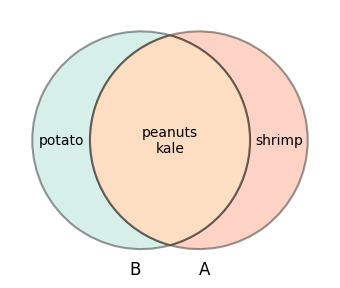

In [50]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

A = {0, 1, 2}
B = {0, 2, 4}

intersection = B & A      # {1, 2}
only_x = B - A            # {3}
only_y = A - B            # {0}

labels = ["peanuts", "shrimp", "kale", "potato", "chicken", "salmon", "apple", "toast"]


elements = sorted(B | A)  # sorted for consistent mapping; gives [0, 1, 2, 3]
label_mapping = {num: label for num, label in zip(elements, labels)}

fig, ax = plt.subplots(figsize=(3.5, 3.5))
fig.patch.set_facecolor('none')  # Set the figure background to transparent

venn = venn2([B, A], ('B', 'A'), ax=ax)
if venn.get_label_by_id('10'):
    venn.get_label_by_id('10').set_text("\n".join(label_mapping[n] for n in only_x))
if venn.get_label_by_id('01'):
    venn.get_label_by_id('01').set_text("\n".join(label_mapping[n] for n in only_y))
if venn.get_label_by_id('11'):
    venn.get_label_by_id('11').set_text("\n".join(label_mapping[n] for n in intersection))
venn.get_patch_by_id('10').set_color('#99d8c9')   
venn.get_patch_by_id('01').set_color('#fc9272')   
venn.get_patch_by_id('11').set_color('#fdae6b')   

for patch in ['10', '01', '11']:
    if venn.get_patch_by_id(patch) is not None:
        venn.get_patch_by_id(patch).set_edgecolor('black')
        venn.get_patch_by_id(patch).set_linewidth(1.5)

plt.tight_layout()
plt.show()

However, there's significant overlap in the foods both Bob and Alice are allergic to, and Alice is currently training a machine learning model that cures cancer, \
so we need a better way of analyzing which of the ingridients will avert certain doom.


Let's add another random variable $Y \sim Ber(q)$, where $Q(Y = y) $ is a measure of whether $\vec{z}$ is in $A$ \
similarly, $q(y)$ = $\frac{1}{56}$

# Joint entropy



cross-entropy tells us how surprised we would be if z came from X, if we assumed it came from Y, <br>
in other words: if we need one bit of information to encode z being in Y, then whats the probability that it came from X? 

>$H(p,q) = {p(z) \log q(z)}$ 



NameError: name 'X' is not defined

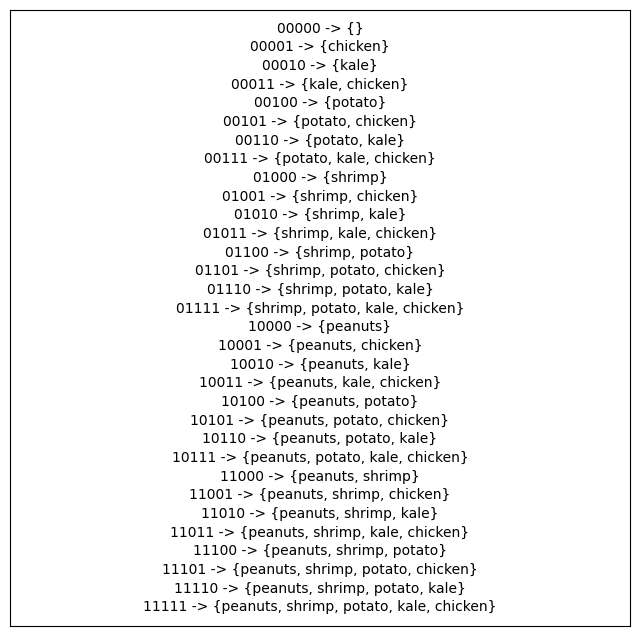

In [ ]:
from itertools import product

# Define universal set elements in a fixed order
universal_set = ["peanuts", "shrimp", "potato", "kale", "chicken"]

# Generate all possible subsets (2^5 total possibilities)
all_subsets = list(product([0, 1], repeat=len(universal_set)))

# Prepare labels for the subsets
subset_labels = [
    "".join(map(str, subset)) + " -> {" + ", ".join(
        [universal_set[i] for i in range(len(subset)) if subset[i] == 1]
    ) + "}"
    for subset in all_subsets
]

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-len(all_subsets), 1)
ax.set_xticks([])
ax.set_yticks([])

# Plot each subset label
for i, label in enumerate(subset_labels):
    ax.text(0, -i, label, fontsize=10, ha="center", va="center")

# Highlight the given sets and sample
highlight_sets = {
    "X": B,
    "Y": A,
    "Z": z
}

for name, highlight_set in highlight_sets.items():
    encoding = "".join(["1" if elem in highlight_set else "0" for elem in universal_set])
    index = all_subsets.index(tuple(int(bit) for bit in encoding))
    ax.text(0, -index, subset_labels[index], fontsize=10, ha="center", va="center", bbox=dict(facecolor='yellow', alpha=0.5))

# Title
plt.title("Binary Encoding of All Possible States in the Space", fontsize=12)
plt.show()


# Convert the universal set to a sorted list for consistent ordering
U_list = sorted(U)

# Encode the sample Z as a bitstring again
z_encoding = [1 if element in z else 0 for element in U_list]

# Create a bar chart representation of the encoding
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(U_list, z_encoding, color=['red' if bit else 'gray' for bit in z_encoding])

# Label the bars
for bar, bit in zip(bars, z_encoding):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, str(bit),
            ha='center', fontsize=12, color='black')

# Formatting
ax.set_ylim(0, 1.5)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Absent", "Present"])
ax.set_title("Bit Encoding of Sample Z in the Space of Total Possibilities", fontsize=12)

plt.show()